In [1]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/spring20/setup_colab.sh -O- | bash

    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/grading.py -O ../grading.py
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/coursera/week3_model_free/submit.py

    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'
    

(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../xserver-common_2%3a1.19.6-1ubuntu4.8_all.deb ...
Unpacking xserver-common (2:1.19.6-1ubuntu4.8) over (2:1.19.6-1ubuntu4.7) ...
Selecting previously unselected package xvfb.
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.8_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.8) ...
Setting up xserver-common (2:1.19.6-1ubuntu4.8) ...
Setting up xvfb (2:1.19.6-1ubuntu4.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Starting virtual X frame buffer: Xvfb.


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from collections import defaultdict 
import random 
import math 


In [32]:
class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):
        
        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        return self._qvalues[state][action]

    def set_qvalue(self, state, action, value):
        self._qvalues[state][action] = value

    def get_value(self, state):
     
        possible_actions = self.get_legal_actions(state)
        if len(possible_actions) == 0:
            return 0.0
        value = max([self.get_qvalue(state,a) for a in possible_actions])

        return value

    def update(self, state, action, reward, next_state):
        gamma = self.discount
        learning_rate = self.alpha
        qvalue = (1-learning_rate)*self.get_qvalue(state,action) + learning_rate*(reward+gamma*self.get_value(next_state))
        self.set_qvalue(state, action, qvalue)

    def get_best_action(self, state):
        possible_actions = self.get_legal_actions(state)
        if len(possible_actions) == 0:
            return None
        q_dict = {a: self.get_qvalue(state,a) for a in possible_actions}
    
        max_q = max(q_dict.values())
        best_actions = [action for action, q in q_dict.items() if q == max_q]
        best_action = random.choice(best_actions)

        return best_action

    def get_action(self, state):
        possible_actions = self.get_legal_actions(state)
        action = None
        if len(possible_actions) == 0:
            return None
        epsilon = self.epsilon

        if random.random() < self.epsilon:
            chosen_action = random.choice(possible_actions)
        else:
            chosen_action = self.get_best_action(state)

        return chosen_action

In [33]:
import gym 
try:
  env = gym.make('Taxi-v3')
except gym.error.DeprecatedEnv:
  env = gym.make('Taxi-v2')
n_actions = env.action_space.n
  

In [34]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       get_legal_actions=lambda s: range(n_actions))

In [35]:
def play_and_train(env, agent, t_max=10**4):
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        a = agent.get_action(s)
        next_s, r, done, _ = env.step(a)
        agent.update(s,a,r,next_s)

        s = next_s
        total_reward += r
        if done:
            break

    return total_reward 

eps = 2.9191091959171894e-05 mean reward = 9.1


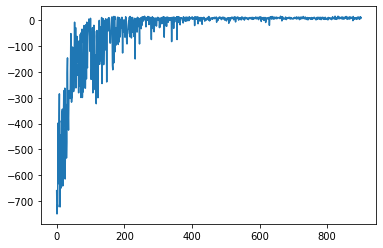

In [36]:
from IPython.display import clear_output

rewards = []
for i in range(1000):
    rewards.append(play_and_train(env, agent))
    agent.epsilon *= 0.99

    if i % 100 == 0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()


first state: [-0.00046287 -0.03186367 -0.04407286  0.03881543]


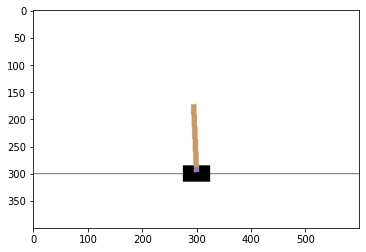

In [37]:
env = gym.make('CartPole-v0')
n_actions = env.action_space.n
print("first state: %s" %(env.reset()))
plt.imshow(env.render('rgb_array'))

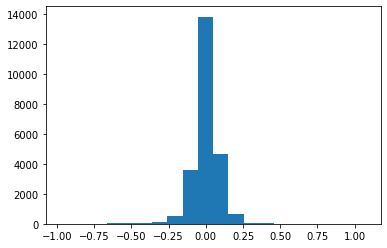

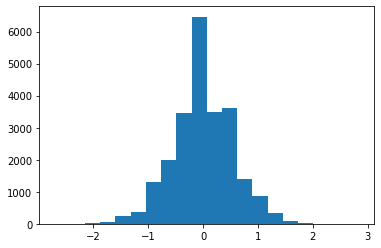

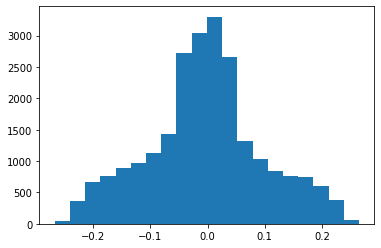

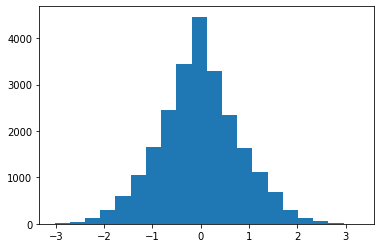

In [39]:
all_states = []
for _ in range(1000):
  all_states.append(env.reset())
  done = False
  while not done:
    s,r,done,_ = env.step(env.action_space.sample())
    all_states.append(s)
    if done:
      break 
all_states = np.array(all_states)
for obs_i in range(env.observation_space.shape[0]):
  plt.hist(all_states[:,obs_i],bins = 20)
  plt.show()

In [51]:
from gym.core import ObservationWrapper


class Binarizer(ObservationWrapper):

    def observation(self, state):

        state[0] = np.round(state[0],0)
        state[1] = np.round(state[1],1)
        state[2] = np.round(state[2],2)
        state[3] = np.round(state[3],1)
        return tuple(state)


In [50]:
env = Binarizer(gym.make("CartPole-v0").env)

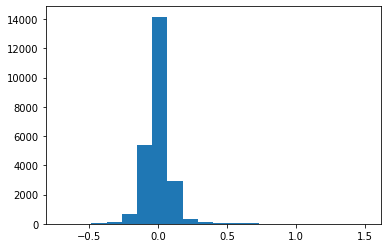

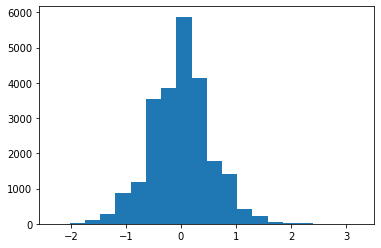

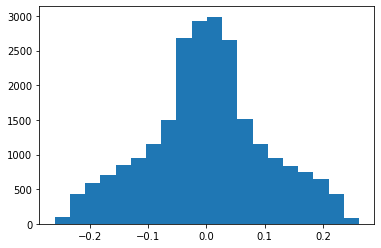

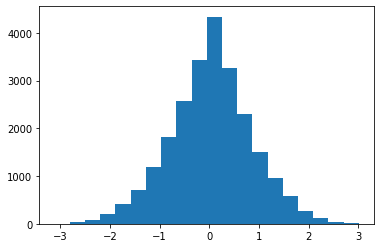

In [47]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s, r, done, _ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:
            break

all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):

    plt.hist(all_states[:, obs_i], bins=20)
    plt.show()

In [48]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       get_legal_actions=lambda s: range(n_actions))

eps = 1.024220671171899e-22 mean reward = 239.9


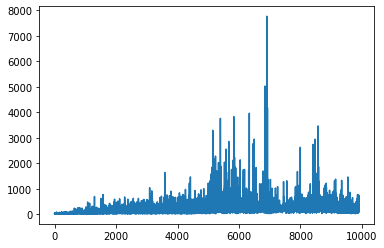

average reward = 223.5505
best reward at iteration 6903 got 7771.0


In [52]:
rewards = []

n_sessions = 10000

for i in range(n_sessions):
    rewards.append(play_and_train(env, agent))
    if i > n_sessions/2:
        agent.epsilon *= 0.99

    if i % 100 == 0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()

max_id = np.argmax(rewards)

print('average reward =', np.mean(rewards))
print('best reward at iteration', max_id,'got', rewards[max_id])

In [53]:
len(agent._qvalues)

23399